# Heart Disease Prediction Using Machine Learning

## Introduction

Heart disease is a major health issue worldwide, and it is difficult to discover the disease before symptoms emerge. Our goal of this project is to utilize machine learning techniques and predict whether or not a person has heart disease. This will be done through our dataset, which is derived from the Cleveland Heart Disease Database and consists of 14 important attributes selected from a total of 76. It encompasses a range of variables including physical and psychological details, such as age, sex, cholesterol, etc. It also categorizes individuals based on the absence (value 0) or presence (values 1-4) of heart disease, providing a clear framework for analyzing the predictive power of medical test results. 

## Preliminary Exploratory Data Analysis

#### Importing libraries

In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

#### Importing the dataset

In [2]:
cleveland_data <- read_csv("data/processed_cleveland.csv")

head(cleveland_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


#### Data cleaning and wrangling

In [3]:
cleveland_data <-  cleveland_data |>
                   mutate(num = as.factor(ifelse(is.na(num), NA, (num > 0)))) |>
                   mutate(sex = as_factor(sex),
                         cp = as_factor(cp),
                         fbs = as_factor(fbs),
                         restecg = as_factor(restecg),
                         exang = as_factor(exang),
                         slope = as_factor(slope),
                         thal = as_factor(thal),
                         num = as_factor(num),
                         ca = as.integer(ca))|>
                   rename(chest_pain = cp,
                          blood_pressure = trestbps,
                          cholesterol = chol,
                          blood_sugar = fbs,
                          rest_ecg = restecg,
                          heart_rate = thalach,
                          angina = exang,
                          st_depression = oldpeak,
                          num_vessels = ca,
                          diagnosis = num) |>
                    na.omit()

head(cleveland_data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,angina,st_depression,slope,num_vessels,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,FALSE


#### Splitting data into training and testing sets

In [4]:
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = diagnosis)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)

Rows: 223
Columns: 14
$ age            <dbl> 37, 41, 56, 57, 57, 52, 57, 49, 64, 50, 58, 66, 69, 59,…
$ sex            <fct> 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0…
$ chest_pain     <fct> 3, 2, 2, 4, 4, 3, 3, 2, 1, 3, 3, 1, 1, 4, 3, 2, 3, 3, 3…
$ blood_pressure <dbl> 130, 130, 120, 120, 140, 172, 150, 130, 110, 120, 120, …
$ cholesterol    <dbl> 250, 204, 236, 354, 192, 199, 168, 266, 211, 219, 340, …
$ blood_sugar    <fct> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1…
$ rest_ecg       <fct> 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2…
$ heart_rate     <dbl> 187, 172, 178, 163, 148, 162, 174, 171, 144, 158, 172, …
$ angina         <fct> 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0…
$ st_depression  <dbl> 3.5, 1.4, 0.8, 0.6, 0.4, 0.5, 1.6, 0.6, 1.8, 1.6, 0.0, …
$ slope          <fct> 3, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1…
$ num_vessels    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1…
$ thal           <

#### Summarizing the training data

In [5]:
# summarizing the number of observations of each diagnosis in the training data
heart_disease_proportions <- cleveland_train |>
                          group_by(diagnosis) |>
                          summarize(n = n()) |>
                          mutate(percent = 100*n/nrow(cleveland_train))
heart_disease_proportions

# summarizing the mean of blood pressure, cholesterol, and heart rate for each diagnosis
average_values <- cleveland_train |>
                group_by(diagnosis) |>
                summarize(mean_blood_pressure = mean(blood_pressure),
                          mean_cholesterol = mean(cholesterol),
                          mean_heart_rate = mean(heart_rate))
average_values

diagnosis,n,percent
<fct>,<int>,<dbl>
FALSE,120,53.81166
TRUE,103,46.18834


diagnosis,mean_blood_pressure,mean_cholesterol,mean_heart_rate
<fct>,<dbl>,<dbl>,<dbl>
FALSE,128.4750,241.5500,157.7333
TRUE,134.3204,254.0388,141.5243


#### Visualizing the relationship between heart disease and o
Examining how the cleveland_train dataset's distribution of three important health metrics—blood pressure, cholesterol, and heart rate—varies between various heart disease diagnosis groups:

1. The Blood Pressure Box Plot, or bp_box_plot, shows the distribution of blood pressure readings for various heart disease classifications.
2. Cholesterol Box Plot (chol_box_plot): Displays the relationship between cholesterol levels and the diagnosis of heart disease.
3. The Heart Rate Box Plot (hr_box_plot) shows how heart rates vary depending on the diagnosis category.

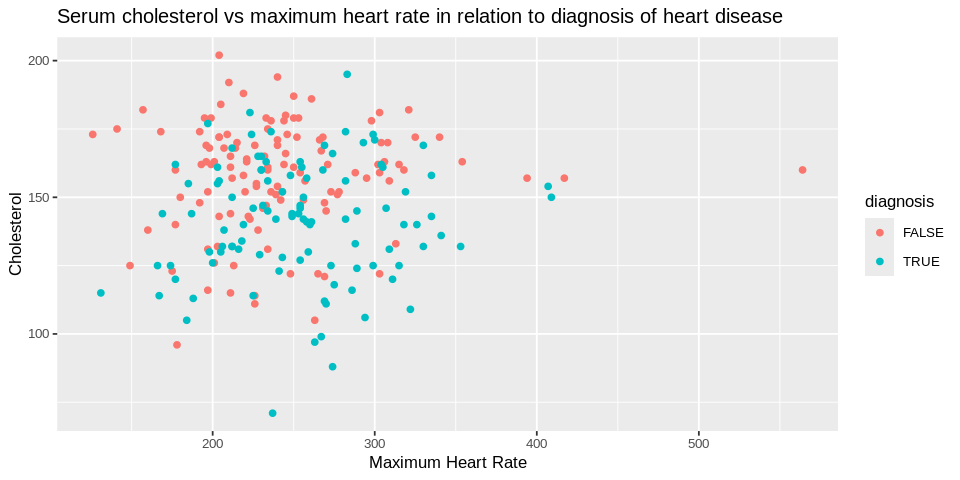

In [14]:
options(repr.plot.height = 4, repr.plot.width = 8)

bp_scatter <- cleveland_train |> 
            ggplot(aes(x = cholesterol, y = heart_rate, color = diagnosis)) + 
            geom_point() +
            labs(x = "Maximum Heart Rate", y = "Cholesterol", title = "Serum cholesterol vs maximum heart rate in relation to diagnosis of heart disease") + 
            theme(text = element_text(size = 10))

bp_scatter